# Final Project

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
bob_ross = read_csv("https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/bob_ross_paintings.csv",) 


New names:
• `` -> `...1`
Rows: 403 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): img_src, painting_title, youtube_src, colors, color_hex
dbl (23): ...1, painting_index, season, episode, num_colors, Black_Gesso, Br...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# vector of colors
colors = c("Liquid_Clear", "Midnight_Black", "Phthalo_Blue", "Phthalo_Green", "Prussian_Blue", "Sap_Green", "Titanium_White", "Van_Dyke_Brown", "Yellow_Ochre", "Alizarin_Crimson", 
            "Black_Gesso", "Bright_Red","Burnt_Umber","Cadmium_Yellow","Dark_Sienna","Indian_Red","Indian_Yellow","Liquid_Black")

In [4]:
# pivoting colors

bob_ross_new = bob_ross |>
    pivot_longer(cols = all_of(colors), names_to = 'Color') |>
    group_by(Color) |>
    summarize(times_used = sum(value)) |>
    arrange(desc(times_used)) 

bob_ross_new

Color,times_used
<chr>,<dbl>
Titanium_White,400
Alizarin_Crimson,380
Van_Dyke_Brown,371
Cadmium_Yellow,346
Yellow_Ochre,327
Phthalo_Blue,323
Bright_Red,321
Midnight_Black,317
Sap_Green,306


In [5]:
# visualizing use of colors in season 1 vs season 31

In [6]:
# data

szn = bob_ross |>
    filter(season == 1 | season == 31) |>
    pivot_longer(cols = all_of(colors), names_to = 'Color') |>
    mutate(Color = factor(Color)) |>
    group_by(season, Color) |>
    summarize(times_used = sum(value), .groups = 'drop') |>
    select(season, Color,times_used)

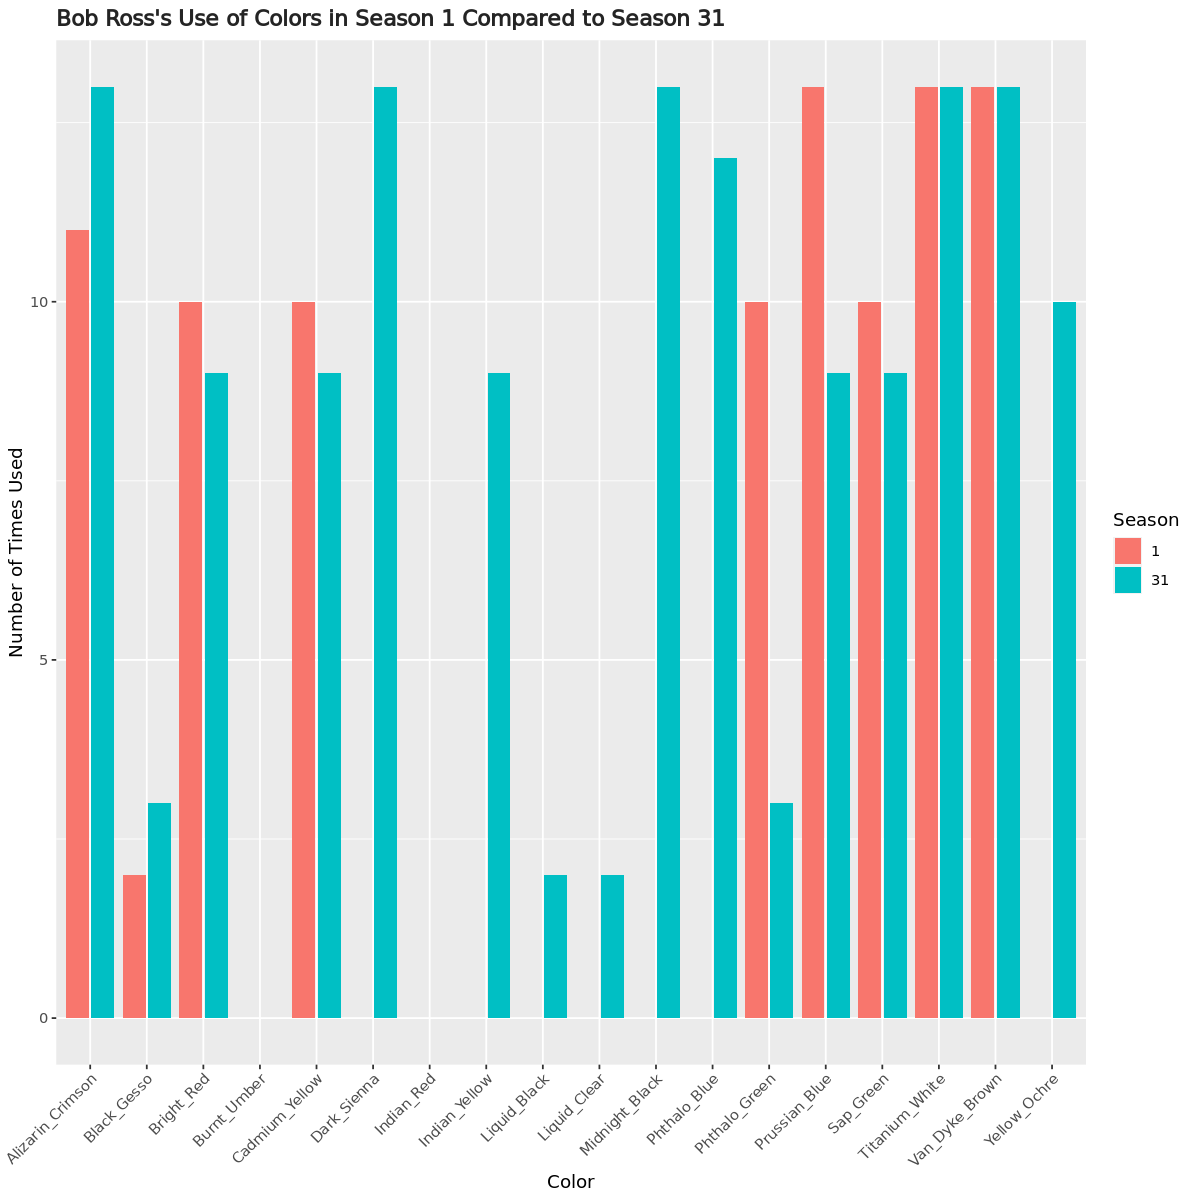

In [7]:
# graph
options(repr.plot.height=10, repr.plot.width = 10, resolution = 1000)

p = ggplot(szn, aes(x=Color, y=times_used, fill=as.character(season))) + geom_col(position='dodge2') + 
    labs(x = 'Color', y = 'Number of Times Used', title = "Bob Ross's Use of Colors in Season 1 Compared to Season 31") +
    theme(
          plot.title = element_text(color = '#242424', face = 'bold'),
             axis.text.x = element_text(angle = 45, hjust=1)) + 
    scale_fill_discrete(name = "Season")

p

In [8]:
avg_colors = bob_ross |>
    group_by(season) |>
    summarize(avg_colors_used = mean(num_colors	))

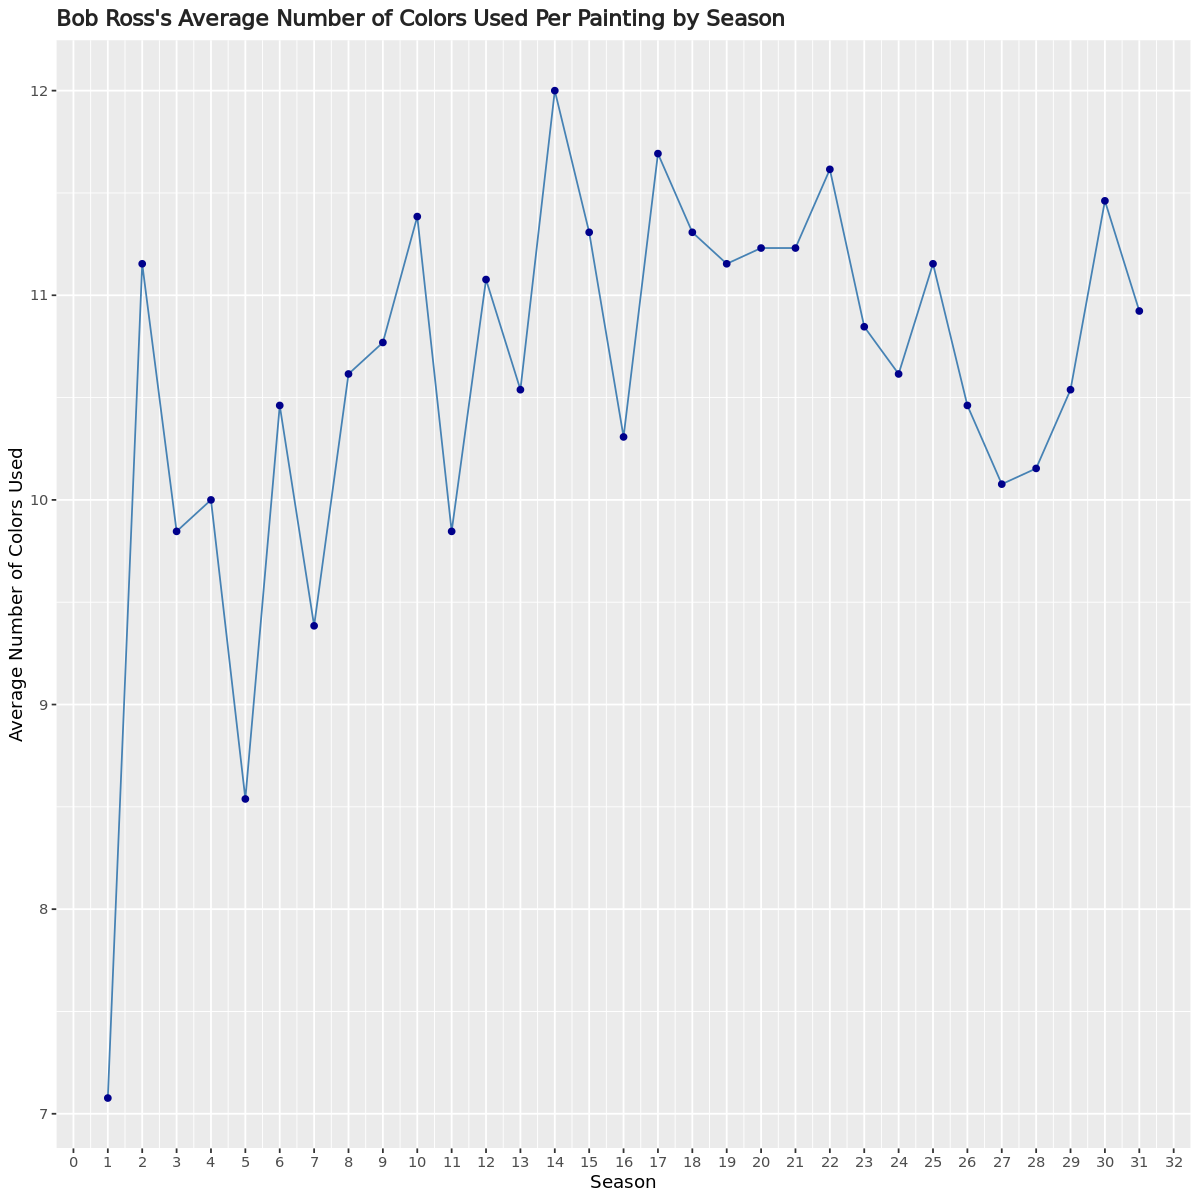

In [9]:
p = ggplot(avg_colors, aes(x=season, y=avg_colors_used)) + 
    geom_line(color='steelblue') + 
    geom_point(color='darkblue') +
    labs(x = 'Season', y='Average Number of Colors Used', title = "Bob Ross's Average Number of Colors Used Per Painting by Season") +
    theme(plot.title = element_text(color = '#242424', face = 'bold')) +
    scale_x_continuous(breaks = scales::pretty_breaks(n = 30))

p

# An Exploration of Color Use by Bob Ross

## Findings


Through the different figures, we can see how Bob Ross uses color in his paintings over the course of his show (31 seasons). Table 1 shows us the frequency of colors used over the entire run of his show. The table is sorted in descending order, with the most used color shown at the top and least used color shown at the bottom. It is not surprising that titanium white is his most used color as white is needed in every painting to lighten and mix new colors and add highlights. The rest of the table is surprising as many colors are used more frequently than black, such as Alizarin Crimson, Van Dyke Brown, Cadmium Yellow, and others. It is also interesting to see which colors are not used frequently by Bob Ross. He used Indian Red only once in the entire show, and he does not use liquid paints such as Liquid Black and Liquid Clear frequently. This is surprising as Bob Ross is famous for using Liquid White, which is not found in this data set, so this may not be the most comprehensive data set.

Looking further into Bob Ross's use of color through the seasons, Figure 2: Bob Ross's Use of Colors in Season 1 Compared to Season 31, we can see the breakdown of the number of times each color is used in his earliest and latest season. In this figure, we can see that there are many colors that Bob Ross used multiple times in season 31 never used in season 1, such as dark sienna, yellow ochre, midnight black and others. An interesting finding from this chart is that Bob Ross did not use any type of black paint in his paintings in season 1. With 13 episodes in a season, we see that in season 1, Bob Ross used Prussian Blue, Titanium White, and Van Dyke Brown in every painting. In season 31, Bob Ross used all of those colors every painting but also added Alizarin Crimson, Dark Sienna, and Midnight Black to that list. There are also two colors he did not use in either season: Burnt Umber and Indian Red. As this chart shows, Bob Ross changed his use of colors from season 1 to season 31.

In Figure 3: Bob Ross's Average Number of Colors Used Per Painting by Season, the average number of colors used per season is shown for the entire run of his show, chronologically. Season 1 has the lowest average number of colors used with only 7, but in every other season he uses a greater number of colors on average for each painting. In season 2, the average number of colors used per painting jumps to above 11, a dramatic rise from season 1, which is very interesting and could suggest a learning curve from season 1. After season 2, the average number of colors used on each painting does not vary as dramatically, but the average number of colors used on each painting jumps up and down throughout the seasons with no visible pattern. The average number of colors used peaks in season 14 with around 12 colors used per painting on average.

